In [35]:
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt
import pandas as pd
MEpisodes = ["M1","M2","M3","M4","M5","M6"]
FEpisodes = ["F1","F2","F3","F4","F5","F6"]
KEpisodes = ["K1","K2","K3","K4","K5","K6"]
userIds = range(200)

In [7]:
data = {}
data['userId'] = []
data['episode'] = []
data['gender'] = []

def addShow(user,episode,gender):
    data['userId'].append(user)
    data['episode'].append(episode)
    data['gender'].append(gender)
for i in range(200):
    user = i
    m=0
    f=0
    k=0
    gender = 0
    if np.random.rand() < 0.5:
        gender = 1
    shows = np.random.randint(2,6)
    for s in range(shows):
        g = np.random.rand()
        if gender == 0:
            if g < 0.65:
                addShow(user,MEpisodes[m],gender)
                m+=1
            elif g > 0.5 and g < 0.85:
                addShow(user,KEpisodes[k],gender)
                k+=1
            else:
                addShow(user,FEpisodes[f],gender)
                f+=1
        else:
            if g < 0.65:
                addShow(user,FEpisodes[f],gender)
                f+=1
            elif g > 0.5 and g < 0.85:
                addShow(user,KEpisodes[k],gender)
                k+=1
            else:
                addShow(user,MEpisodes[m],gender)
                m+=1

            
dataset = pd.DataFrame(data)   
trainingdata = dataset[0:500]
testData = dataset[500:]     

324 365


C:\Users\SUDHANA\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:8: FutureWarning: sort(....) is deprecated, use sort_index(.....)
C:\Users\SUDHANA\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:11: FutureWarning: sort(....) is deprecated, use sort_index(.....)


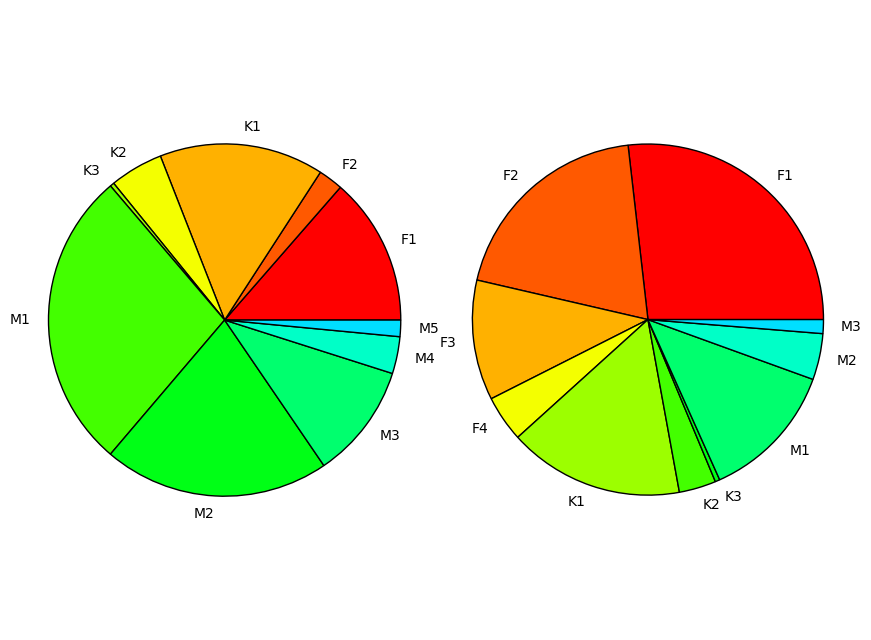

In [71]:
### Training summaries
%matplotlib inline
maleCount = dataset[dataset.gender == 1].shape[0]
femaleCount = dataset[dataset.gender == 0].shape[0]
print(maleCount,femaleCount)
fig,axes = plt.subplots(nrows = 1, ncols=  2, figsize=(10,8))
#c = get_cmap(len(MEpisodes))
m=trainingdata[trainingdata.gender==0].groupby('episode').agg('count').sort()['gender']
#print(m)
i=axes[0].pie(m.values, labels=m.index,colors=c)
f=trainingdata[trainingdata.gender==1].groupby('episode').agg('count').sort()['gender']
i=axes[1].pie(f.values, labels=f.index, colors=c)
#print(f)
i=axes[0].axis('equal')
i=axes[1].axis('equal')

In [73]:
from sklearn import linear_model as lm
logReg = lm.LogisticRegression()

In [75]:
trainingdata['userId','episodes']

KeyError: ('userId', 'episodes')

In [81]:
logReg.fit(X=trainingdata[['userId','episode']],y=trainingdata[['gender']])

ValueError: could not convert string to float: 'F1'

In [79]:
trainingdata[['userId','episode']]

,userId,episode
0,0,F1
1,0,K1
2,0,K2
3,1,M1
4,1,F1
5,2,M1
6,2,F1
7,2,M2
8,2,M3
9,3,F1


In [69]:
import matplotlib.cm as cmx
import matplotlib.colors as colors
def get_cmap(N):
    '''Returns a function that maps each index in 0, 1, ... N-1 to a distinct 
    RGB color.'''
    color_norm  = colors.Normalize(vmin=0, vmax=N-1)
    scalar_map = cmx.ScalarMappable(norm=color_norm, cmap='hsv') 
    def map_index_to_rgb_color(index):
        return scalar_map.to_rgba(index)
    return map_index_to_rgb_color

N = len(MEpisodes)*3
a = get_cmap(N)
c = [a(i) for i in range(N)]

In [70]:
c

[(1.0, 0.0, 0.0, 1.0),
 (1.0, 0.34742681801505326, 0.0, 1.0),
 (1.0, 0.69485363603010653, 0.0, 1.0),
 (0.95771954595484032, 1.0, 0.0, 1.0),
 (0.61029272793978684, 1.0, 0.0, 1.0),
 (0.26286590992473358, 1.0, 0.0, 1.0),
 (0.0, 1.0, 0.084560769107334968, 1.0),
 (0.0, 1.0, 0.43198539834503574, 1.0),
 (0.0, 1.0, 0.77941002758273625, 1.0),
 (0.0, 0.87316454412042643, 1.0, 1.0),
 (0.0, 0.52573772610537328, 1.0, 1.0),
 (0.0, 0.17831090809032013, 1.0, 1.0),
 (0.16911590992473247, 0.0, 1.0, 1.0),
 (0.51654272793978673, 0.0, 1.0, 1.0),
 (0.86396954595484032, 0.0, 1.0, 1.0),
 (1.0, 0.0, 0.78860363603010641, 1.0),
 (1.0, 0.0, 0.44117681801505321, 1.0),
 (1.0, 0.0, 0.09375, 1.0)]